In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 3

In [83]:
def circle (vh):
    plt.figure(figsize=(7, 7))
    plt.grid()
    plt.arrow(0, 0, *(vh[:,0]), color='red')
    plt.arrow(0, 0, *(vh[:,1]), color='green')
    phi = np.arange(0, 2*np.pi, 0.01)
    plt.scatter(np.cos(phi), np.sin(phi), s=0.2)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

In [84]:
def elipse (u, s):
    plt.figure(figsize=(7, 7))
    plt.grid()
    plt.arrow(0, 0, s[0]*u.T[0][0], s[0]*u.T[0][1], color='red')
    plt.arrow(0, 0, s[1]*u.T[1][0], s[1]*u.T[1][1], color='green')
    phi = np.arange(0, 2*np.pi, 0.01)
    x = s[0]*np.cos(phi)
    y = s[1]*np.sin(phi)
    a = u.T[0][1]
    b = u.T[0][0]
    cos = 1/(1+(a/b)**2)**0.5
    sin = (a/b)/(1+(a/b)**2)**0.5
    plt.scatter(x * cos - sin * y, sin * x + cos * y, s=0.2)
    length = max([((s[0]*u.T[0][0])**2 + (s[0]*u.T[0][1])**2)**0.5, ((s[1]*u.T[1][0])**2 + (s[1]*u.T[1][1])**2)**0.5])
    plt.xlim(-length * 1.2, length* 1.2)
    plt.ylim(-length* 1.2, length* 1.2)
    plt.show()

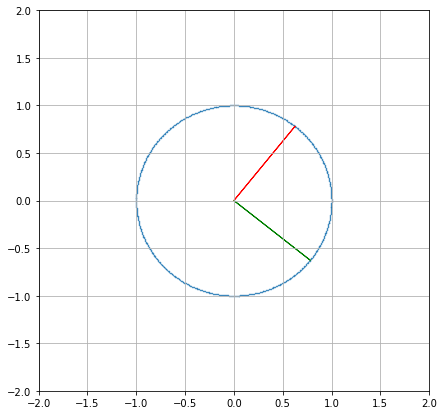

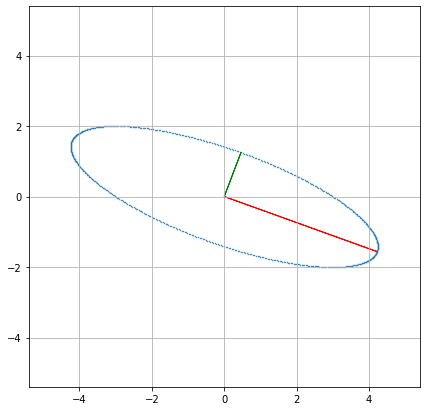

In [85]:
A = np.array([[3,3], [0, -2]])
u, s, vh = np.linalg.svd(A)
circle(vh)
elipse(u, s)

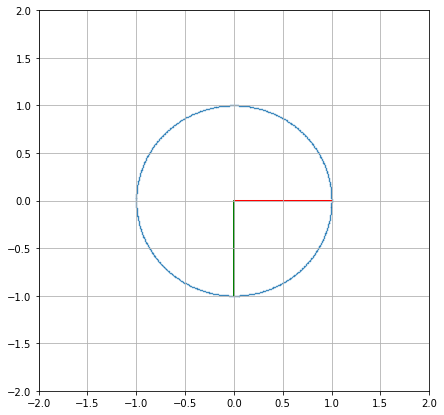

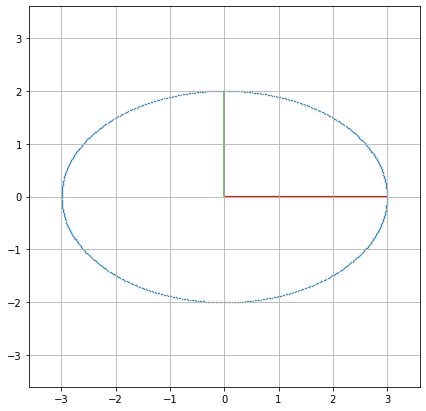

In [86]:
A = np.array([[3,0], [0, -2]])
u, s, vh = np.linalg.svd(A)
circle(vh)
elipse(u, s)

## Task 6

In [107]:
p = 5000
k = 100
A = np.random.sample((p, p))
C = np.identity(k)
U = np.random.sample((p, k))
V = np.random.sample((k, p))

In [114]:
def broot (A, U, V):
    return np.linalg.inv(A + U @ C @ V)

In [115]:
def woodbury (A, U, V):
    A_ = np.linalg.inv(A)
    S_ = np.linalg.inv(C + V @ A_ @ U)
    return A_ - A_ @ U @ S_ @ V @ A_

In [117]:
%timeit broot(A, U, V)

2.15 s ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [119]:
%timeit woodbury(A, U, V)

3.61 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Заметим, что результаты противоречат условию. 
Дело в том, что для того, что бы этот метож работал быстрее, обратная матрица А должна быть уже вычисленна.

In [120]:
A_ = np.linalg.inv(A)

In [121]:
def woodbury (A, U, V):
    S_ = np.linalg.inv(C + V @ A_ @ U)
    return A_ - A_ @ U @ S_ @ V @ A_

In [122]:
%timeit woodbury(A, U, V)

1.44 s ± 62.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


В этом случае видно, что метод работает заметно быстрее.

In [126]:
broot(A, U, V) - woodbury(A, U, V)

array([[ 1.65787550e-10,  2.69557598e-10, -2.40331560e-10, ...,
        -1.23581756e-10, -6.75524220e-11, -2.53943644e-10],
       [-3.12850634e-10, -5.20007704e-10,  4.57365756e-10, ...,
         2.33503133e-10,  1.31748445e-10,  4.77888951e-10],
       [ 2.87857627e-10,  4.32690328e-10, -3.92821831e-10, ...,
        -2.05378145e-10, -1.23287963e-10, -4.05514400e-10],
       ...,
       [-1.06005205e-10, -1.94975716e-10,  1.54651347e-10, ...,
         7.82233445e-11,  4.59096164e-11,  1.57312760e-10],
       [-1.35846716e-11,  2.80842918e-11, -1.83463522e-11, ...,
        -1.27927495e-11,  3.99459459e-12, -9.12547121e-12],
       [ 2.84697099e-10,  5.14315590e-10, -4.59806859e-10, ...,
        -2.43154830e-10, -1.18864057e-10, -4.66053307e-10]])

In [ ]:
С точностью до ошибок округления матрицы сходятся